In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/Users/aparnamallik/Documents/MLproject/notebook/data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [10]:
df.nunique()



gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [20]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [40]:
#students with full marks
reading_full=df[df['reading_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()

print(f" number of students with full marks in reading : {reading_full} \n number of students with full marks in maths: {math_full}\n number of students with full marks in writing : {writing_full}")

#student scoring less than 20:
reading_less_20=df[df['reading_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()

print(f" number of students scoring less than 20 in reading : {reading_less_20} \n number of students scoring less than 20 in maths: {math_less_20}\n number of students scoring less than 20 in writing : {writing_less_20}")


 number of students with full marks in reading : 17 
 number of students with full marks in maths: 7
 number of students with full marks in writing : 14
 number of students scoring less than 20 in reading : 1 
 number of students scoring less than 20 in maths: 4
 number of students scoring less than 20 in writing : 3


<Axes: xlabel='average', ylabel='Count'>

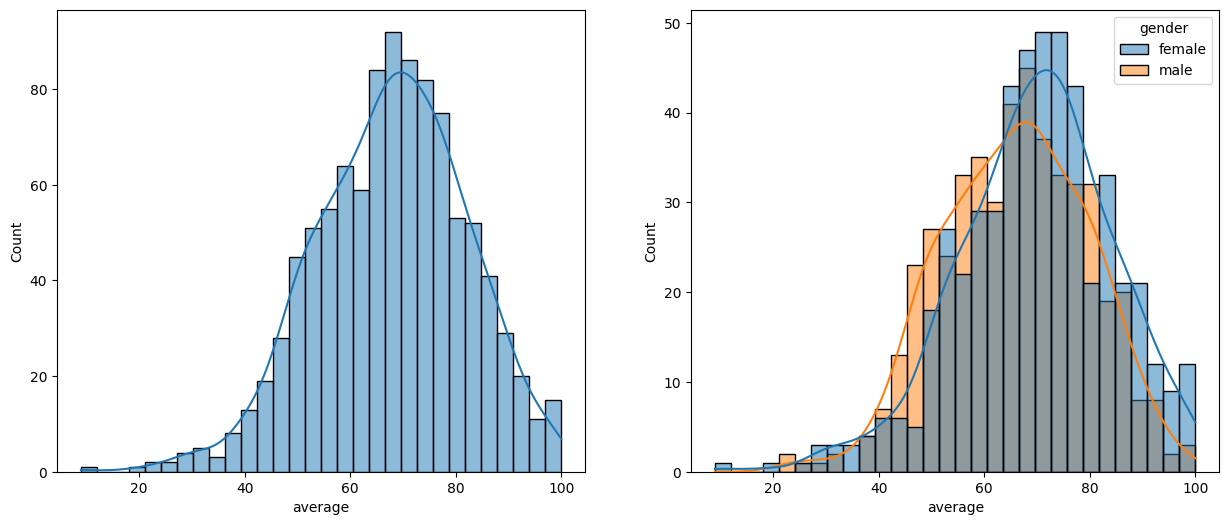

In [50]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x=df['average'],bins=30, kde=True)

plt.subplot(1,2,2)
sns.histplot(data=df, x=df['average'],bins=30, kde=True, hue=df['gender'])


<Axes: xlabel='average', ylabel='Count'>

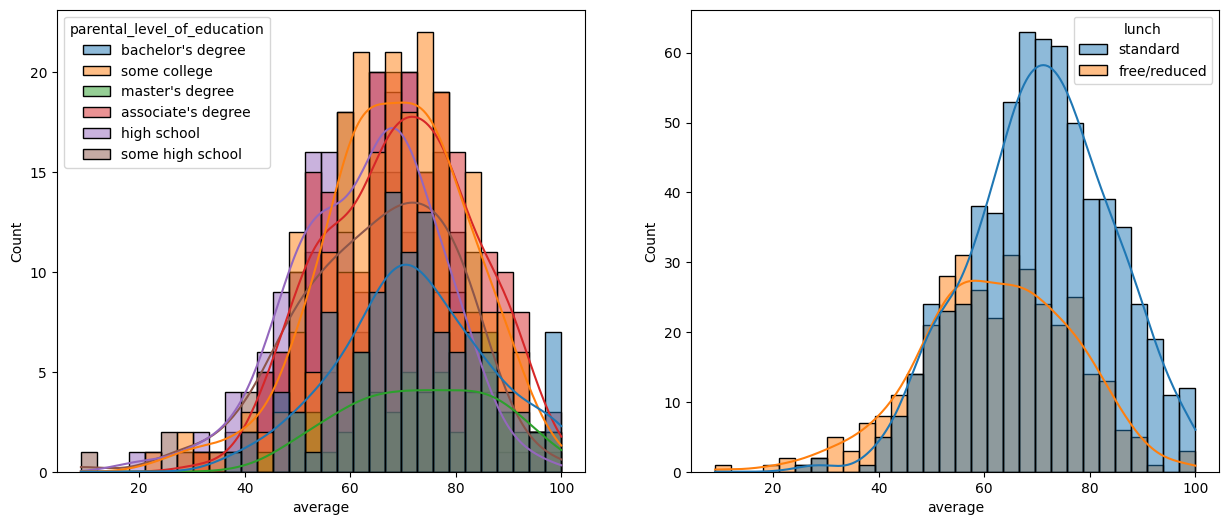

In [54]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x=df['average'],bins=30, kde=True,hue=df['parental_level_of_education'])

plt.subplot(1,2,2)
sns.histplot(data=df, x=df['average'],bins=30, kde=True, hue=df['lunch'])


<Axes: xlabel='average', ylabel='Count'>

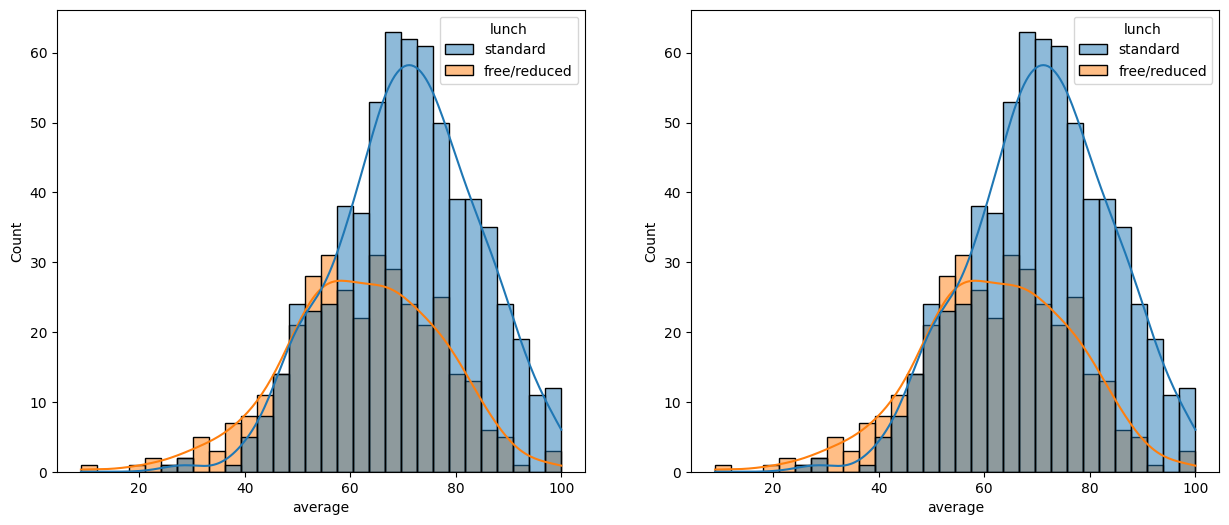

In [60]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data=df[df['gender']=='female'], x=df['average'],bins=30, kde=True,hue=df['lunch'])

plt.subplot(1,2,2)
sns.histplot(data=df[df['gender']=='male'], x=df['average'],bins=30, kde=True,hue=df['lunch'])




In [62]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: ylabel='writing_score'>

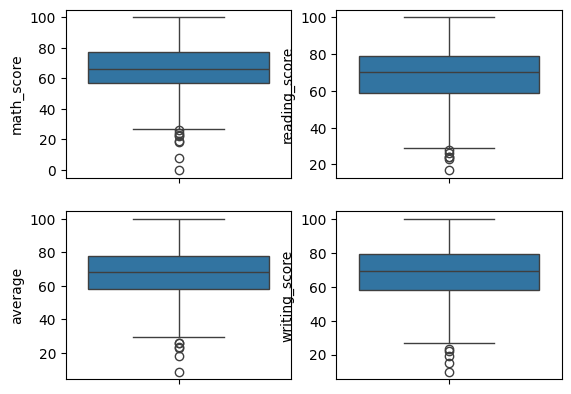

In [71]:
plt.figsize=(15,14)
plt.subplot(2,2,1)
sns.boxplot(df['math_score'])
plt.subplot(2,2,3)
sns.boxplot(df['average'])
plt.subplot(2,2,2)
sns.boxplot(df['reading_score'])
plt.subplot(2,2,4)
sns.boxplot(df['writing_score'])





['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
